# Facial Expression Recognition

## Project Description

The goal of this project is to classify facial expressions into seven distinct categories. The emotions to be recognized include:

- 0: Angry
- 1: Disgust
- 2: Fear
- 3: Happy
- 4: Sad
- 5: Surprise
- 6: Neutral

### Dataset

The dataset consists of 48x48 pixel grayscale images of faces. Each image is labeled with one of the seven emotion categories. This data is used to train and evaluate the performance of the different classifiers.

### Methodology

We used the following three approaches to perform facial expression recognition:

1. **LBP-based KNN**:
   - Local Binary Patterns (LBP) are used for feature extraction to capture facial textures.
   - K-Nearest Neighbors (KNN) is employed for classification using the extracted LBP features.
   - Implemented using the `scikit-learn` library.

2. **Convolutional Neural Network (CNN)**:
   - A CNN model is designed to automatically learn spatial features from the grayscale facial images.
   - This method takes advantage of the powerful feature extraction capabilities of deep learning.
   - Implemented using the `PyTorch` framework.

3. **Vision Transformer (ViT)**:
   - A Vision Transformer model is used to process the image data in a way that leverages transformer architectures.
   - This approach is known for its effectiveness in capturing global image dependencies.
   - Implemented using the `PyTorch` framework.

### Tools and Libraries

- **scikit-learn**: For implementing the LBP-based KNN classifier.
- **PyTorch**: For building and training the CNN and ViT models.
- **scikit-image**: For applying Local Binary Patterns (LBP) to the images.
- **Jupyter Notebook**: For organizing code, results, and documentation in an interactive environment.

### Expected Outcomes

The primary objective of this project is to develop a robust facial expression recognition system capable of accurately classifying emotions from static face images. By utilizing a combination of traditional machine learning (LBP-based KNN) and deep learning techniques (CNN and ViT), we aim to achieve high accuracy in recognizing the seven emotion categories.



### Method: LBP-based KNN for Facial Expression Recognition

This approach utilizes the Local Binary Patterns (LBP) method for feature extraction combined with the K-Nearest Neighbors (KNN) algorithm for facial expression classification. The key steps involved in this method are as follows:

1. **Image Preprocessing**:
   - Grayscale images are loaded from the dataset and resized to a standard size of 48x48 pixels.
   - This ensures consistency in the image input size for feature extraction.


In [2]:
import os
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split

dataset_path = 'archive/' 

def load_images_from_folder(base_path):
    images = []
    labels = []
    for label in os.listdir(base_path):
        label_path = os.path.join(base_path, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    image = cv2.resize(image, (48, 48))
                    images.append(image)
                    labels.append(label) 
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder(os.path.join(dataset_path, 'train'))
test_images, test_labels = load_images_from_folder(os.path.join(dataset_path, 'test'))


2. **Feature Extraction**:
   - Local Binary Patterns (LBP) are used to extract texture features from each image.
   - The LBP features are represented as histograms, capturing the local texture information of the facial expressions.

3. **Feature Normalization**:
   - The extracted LBP histograms are normalized using `StandardScaler` to standardize the feature values.
   - Normalization helps in improving the performance of the KNN classifier by ensuring that all features contribute equally.

4. **Label Encoding**:
   - The labels are encoded as integers using `LabelEncoder`, where each integer represents a specific emotion category (e.g., angry -> 0, disgust -> 1, etc.).


In [3]:
# Function to extract LBP features from an image
def extract_lbp_features(image):
    lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
    hist = hist.astype('float')
    hist /= (hist.sum() + 1e-7)  # Normalize the histogram
    return hist

# Extract LBP features for all training and test images
X_train_lbp = np.array([extract_lbp_features(img) for img in train_images])
X_test_lbp = np.array([extract_lbp_features(img) for img in test_images])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_lbp = scaler.fit_transform(X_train_lbp)
X_test_lbp = scaler.transform(X_test_lbp)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)




5. **Classification with KNN**:
   - The K-Nearest Neighbors (KNN) classifier is trained on the normalized LBP features from the training set.
6. **Model Evaluation**:
   - The trained KNN model makes predictions on the test set.
   - The model's performance is evaluated using accuracy and a confusion matrix to analyze its classification capabilities.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lbp, y_train)

y_pred = knn.predict(X_test_lbp)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Model Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')


Model Accuracy: 0.22499303427138478
Confusion Matrix: 
[[257   9 137 291 113  96  55]
 [ 19  13   9  34  12  17   7]
 [199  12 201 303 141  98  70]
 [338  17 262 615 255 176 111]
 [224   7 190 413 202 142  55]
 [253  17 157 398 196 164  62]
 [127   8 169 197  94  73 163]]


### Results and Analysis of the LBP-based KNN Model

The LBP-based KNN model achieved an accuracy of approximately **22.5%**, as shown in the results above. The confusion matrix provides a detailed view of the model's performance across the seven emotion categories.

#### Model Performance

- **Accuracy**: 22.5%
- The low accuracy suggests that the LBP-based KNN approach struggles to accurately classify facial expressions, indicating the need for more robust feature extraction or alternative classification methods.

#### Confusion Matrix

The confusion matrix reveals the distribution of predictions made by the model, with each row representing the true emotion label and each column representing the predicted label. High values along the diagonal indicate correct classifications, while off-diagonal values show misclassifications. 

The results indicate significant confusion between certain emotion categories, suggesting that the model has difficulty distinguishing between similar facial expressions. This highlights the limitations of using only LBP features with KNN for this complex classification task.

The next steps involve implementing the CNN and ViT models to compare their performance with the LBP-based KNN approach.


### Method: Convolutional Neural Network (CNN) for Facial Expression Recognition

This method employs a Convolutional Neural Network (CNN) to classify facial expressions. The CNN is designed to automatically learn spatial hierarchies of features from grayscale facial images.

#### 1. Dataset Preparation

- **Custom Dataset Class**: A `Dataset` class named `EmotionDataset` is implemented to handle image loading and preprocessing. It takes image paths, labels, and optional transformations as inputs.
- **Data Loading**: Images are loaded from the specified directories (`train` and `test`), resized to 48x48 pixels, and converted to grayscale.
- **Data Transformation**: Images are transformed into tensors and normalized to improve training efficiency.



In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import cv2
import os

In [7]:
class EmotionDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = cv2.imread(self.image_paths[idx], cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (48, 48))
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label


In [8]:
def load_data(dataset_path):
    image_paths = []
    labels = []
    label_map = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

    for label in os.listdir(dataset_path):
        label_dir = os.path.join(dataset_path, label)
        if os.path.isdir(label_dir):
            for image_name in os.listdir(label_dir):
                image_paths.append(os.path.join(label_dir, image_name))
                labels.append(label_map[label])

    return image_paths, labels

train_image_paths, train_labels = load_data('archive/train')
test_image_paths, test_labels = load_data('archive/test')

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create datasets
train_dataset = EmotionDataset(train_image_paths, train_labels, transform=transform)
test_dataset = EmotionDataset(test_image_paths, test_labels, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


#### 2. Model Architecture

The CNN architecture consists of the following layers:
- **Convolutional Layers**:
  - Three convolutional layers with increasing filter sizes (32, 64, 128) and a kernel size of 3x3.
  - ReLU activation is applied to introduce non-linearity.
  - Max-pooling is used to reduce spatial dimensions while retaining the most important features.
- **Fully Connected Layers**:
  - Two fully connected (dense) layers with a dropout layer to reduce overfitting.
  - The final layer outputs class scores for each of the seven emotion categories.

In [9]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 7)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 6 * 6)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


#### 3. Training Process

- **Loss Function**: Cross-entropy loss is used to evaluate the classification performance.
- **Optimizer**: The Adam optimizer is employed to update the model parameters.
- **Training Loop**: The model is trained for 20 epochs, with loss values monitored using a progress bar for each epoch.
- **Device Utilization**: The code checks for GPU availability to speed up the training process.


In [11]:
from tqdm import tqdm 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNNModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with tqdm and logging
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    for i, (images, labels) in progress_bar:
        # Move data to GPU
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update tqdm progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/20], Loss: 1.6705


Epoch [2/20], Loss: 1.4437


Epoch [3/20], Loss: 1.3272


Epoch [4/20], Loss: 1.2475


Epoch [5/20], Loss: 1.1834


Epoch [6/20], Loss: 1.1234


Epoch [7/20], Loss: 1.0781


Epoch [8/20], Loss: 1.0173


Epoch [9/20], Loss: 0.9593


Epoch [10/20], Loss: 0.9108


Epoch [11/20], Loss: 0.8580


Epoch [12/20], Loss: 0.8144


Epoch [13/20], Loss: 0.7738


Epoch [14/20], Loss: 0.7341


Epoch [15/20], Loss: 0.6960


Epoch [16/20], Loss: 0.6667


Epoch [17/20], Loss: 0.6306


Epoch [18/20], Loss: 0.5990


Epoch [19/20], Loss: 0.5800


Epoch [20/20], Loss: 0.5535


#### 4. Evaluation

- **Testing Loop**: The trained model's performance is evaluated on the test set, and accuracy is calculated.
- **Confusion Matrix**: The confusion matrix is plotted to visualize the model's performance across the different emotion categories using a heatmap.


Test Accuracy: 57.58%


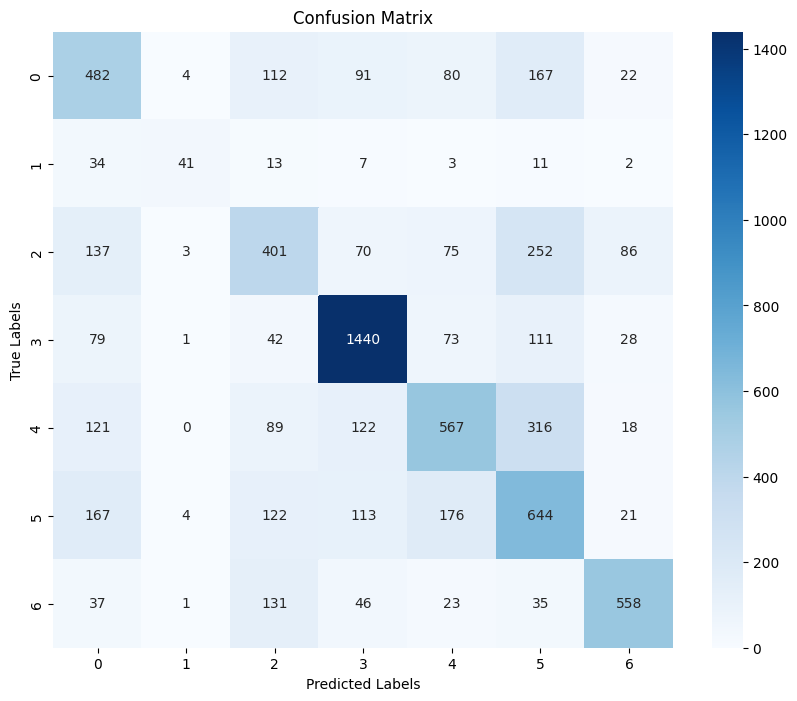

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Initialize lists to store true labels and predicted labels
all_labels = []
all_predictions = []
model.eval()
correct = 0
total = 0

with torch.no_grad():
    progress_bar = tqdm(enumerate(test_loader), total=len(test_loader), desc='Testing', leave=False)
    for i, (images, labels) in progress_bar:
        # Move data to GPU
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect all true labels and predictions for confusion matrix
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Results and Analysis of the CNN Model

The CNN model achieved a test accuracy of **57.58%**, as shown in the confusion matrix below. The matrix provides a detailed view of the model's performance across the seven emotion categories, with each row representing the true labels and each column representing the predicted labels.

#### Observations

- The model shows strong performance in correctly identifying certain emotions, particularly for the class represented by **True Label 3**, where the number of correct predictions is significantly higher compared to other classes.
- There is notable confusion between similar emotions:
  - **True Label 0** ("Angry") is often misclassified as **Predicted Labels 2 and 4** ("Fear" and "Sad"), indicating the difficulty in distinguishing these emotions.
  - **True Label 2** ("Fear") also shows frequent misclassifications with **Predicted Labels 0, 3, and 5** ("Angry," "Happy," and "Surprise"), suggesting overlap in the features the model uses to differentiate these emotions.
  - **True Label 4** ("Sad") is sometimes misclassified as **Predicted Labels 3 and 5** ("Happy" and "Surprise"), highlighting challenges in distinguishing expressions with subtle differences.

The confusion matrix indicates that while the CNN model performs better than traditional methods, it still struggles with certain emotions, especially those that are visually similar or have overlapping features.

Although the model shows improvement compared to the LBP-based KNN approach, there is still room for enhancement to boost its ability to differentiate similar facial expressions.



### Method: Vision Transformer (ViT) for Facial Expression Recognition

This method leverages the Vision Transformer (ViT) architecture for classifying facial expressions. ViTs are known for their ability to handle image data effectively using transformer-based architectures, which excel at capturing both local and global dependencies. Below is a detailed breakdown of the process:

#### 1. Dataset Preparation

- **Custom Dataset Class**: The `EmotionDataset` class is implemented to load images, convert them to RGB format, resize them to the required input size of 224x224 pixels, and preprocess them using the ViT feature extractor.
- **Data Loading**: The images are organized into training and testing datasets with corresponding labels, where each emotion is mapped to a numerical label.
- **ViT Feature Extractor**: The `ViTFeatureExtractor` from the Hugging Face Transformers library is used to preprocess images to the format expected by the ViT model.


In [21]:
class EmotionDataset(Dataset):
    def __init__(self, image_paths, labels, feature_extractor):
        self.image_paths = image_paths
        self.labels = labels
        self.feature_extractor = feature_extractor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load the image and convert it to RGB format
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        image = cv2.resize(image, (224, 224))  # Resize to match ViT input size
        
        # Use the feature extractor to preprocess the image
        image = self.feature_extractor(images=image, return_tensors="pt")['pixel_values'].squeeze()
        label = self.labels[idx]
        return image, label


In [22]:
from transformers import ViTFeatureExtractor

# Load ViT feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

def load_data(dataset_path):
    image_paths = []
    labels = []
    label_map = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

    for label in os.listdir(dataset_path):
        label_dir = os.path.join(dataset_path, label)
        if os.path.isdir(label_dir):
            for image_name in os.listdir(label_dir):
                image_paths.append(os.path.join(label_dir, image_name))
                labels.append(label_map[label])

    return image_paths, labels

train_image_paths, train_labels = load_data('archive/train')
test_image_paths, test_labels = load_data('archive/test')

# Create datasets
train_dataset = EmotionDataset(train_image_paths, train_labels, feature_extractor)
test_dataset = EmotionDataset(test_image_paths, test_labels, feature_extractor)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


#### 2. Model Architecture

- **Pre-trained Model**: The `ViTForImageClassification` model pre-trained on the ImageNet dataset (`vit-base-patch16-224-in21k`) is fine-tuned to classify the seven emotion categories.
- **Architecture Details**:
  - The model is initialized with the number of output labels set to 7, matching the emotion categories in the dataset.
  - The transformer-based architecture processes the image as a sequence of patches, learning complex patterns across the entire image.



In [23]:
from transformers import ViTForImageClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained ViT model
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k', num_labels=7)
model.to(device)


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

#### 3. Training Process

- **Loss Function**: Cross-entropy loss is employed to guide the learning process by penalizing misclassifications.
- **Optimizer**: The Adam optimizer with a learning rate of 1e-5 is used to update model parameters efficiently.
- **Training Loop**: The model is trained for 5 epochs, with the progress monitored and loss values logged for each epoch using the `tqdm` progress bar.

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    for images, labels in progress_bar:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')


Epoch [1/5], Loss: 1.2413


Epoch [2/5], Loss: 0.9245


Epoch [3/5], Loss: 0.7834


Epoch [4/5], Loss: 0.6528


Epoch [5/5], Loss: 0.5228


#### 4. Evaluation

- **Testing Loop**: The model's performance is evaluated on the test set, and accuracy is calculated to gauge the effectiveness of the model.
- **Confusion Matrix**: A confusion matrix is generated to provide insights into the model's classification performance across the different emotion categories, highlighting areas where the model is performing well and where it struggles.

Test Accuracy: 69.31%


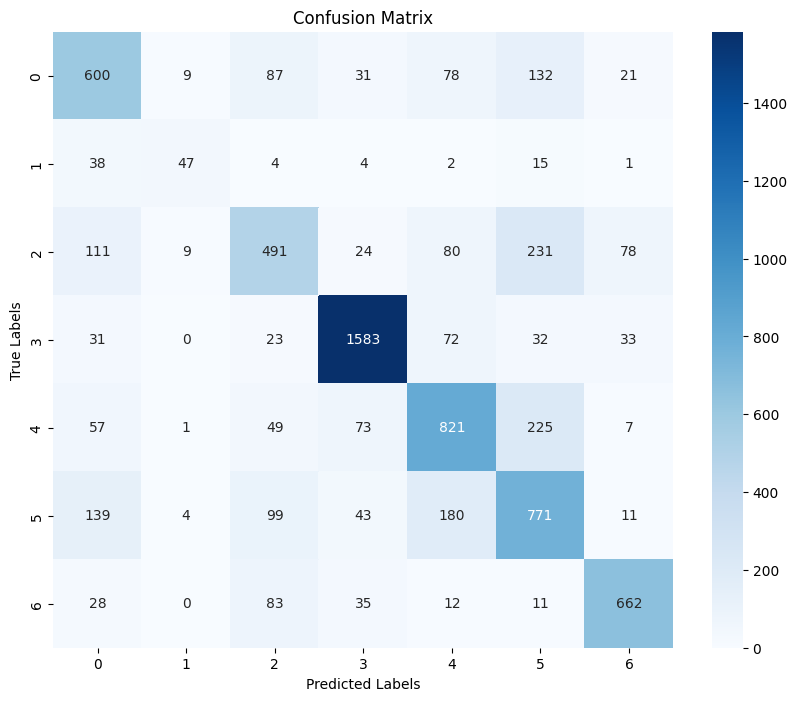

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing', leave=False):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images).logits
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Results and Analysis of the ViT Model

The Vision Transformer (ViT) model achieved a test accuracy of **69.31%**, as illustrated by the confusion matrix above. This matrix provides a comprehensive view of the model's performance in classifying facial expressions into the seven emotion categories, with rows representing the true labels and columns representing the predicted labels.

#### Observations

- The ViT model demonstrates a noticeable improvement in classification accuracy compared to the previously used methods, indicating its ability to capture both local and global features effectively.
- **True Label 3** ("Happy") is identified with a high number of correct predictions, reflecting the model's strength in recognizing this emotion.
- Some emotions still exhibit confusion with others:
  - **True Label 0** ("Angry") is often misclassified as **Predicted Labels 2, 4, and 5** ("Fear," "Sad," and other expressions), suggesting the need for further refinement in distinguishing these expressions.
  - **True Label 2** ("Fear") shows significant confusion with **Predicted Labels 0, 4, and 5**, indicating the model's difficulty in precisely classifying these related emotions.
  - **True Label 4** ("Sad") is occasionally misclassified as **Predicted Labels 3 and 5** ("Happy" and "Surprise"), highlighting areas where feature overlap may be affecting performance.

The ViT model outperforms traditional approaches like KNN and even CNN in terms of classification accuracy, showcasing the power of transformer-based architectures in image analysis.



### Model Saving

- The trained ViT model's state is saved to a file named `vit_emotion_model.pth`, allowing for future use without the need to retrain from scratch.


In [27]:
model_save_path = 'vit_emotion_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')


Model saved to vit_emotion_model.pth
